<p style="font-size:300%;font-family:Source Sans Pro;text-align:center;line-height:50px;">Final Project<br>FUEL PRODUCTION VS COMSUMPTION</p>

<table style="width:100%;font-family:'Roboto'; font-size:120%">
  <tr>
    <th colspan="3" style="text-align: center; vertical-align: middle;">
      MEMBERS & TASKS  
    </th>
  </tr>
  <tr>
    <th style="text-size:150%; text-align: center; vertical-align: middle;">ID</th>
    <th style="text-align: center; vertical-align: middle;">NAME</th>
    <th style="text-align: center; vertical-align: middle;">TASK</th>
  </tr>
  <tr>
    <td style="text-align: left; vertical-align: middle;">20127597</td>
    <td style="text-align: left; vertical-align: middle;">Bùi Tấn Phương</td>
  </tr>
  <tr>
    <td style="text-align: left; vertical-align: middle;">20127525</td>
    <td style="text-align: left; vertical-align: middle;">Trần Quốc Trung</td>
  </tr>
</table>

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data collection:

**Subject:** Rolling Stones Spotify Dataset  
**Source:** [Rolling Stones Spotify Dataset](www.kaggle.com/datasets/jarredpriester/rolling-stones-spotify-dataset?select=rolling_stones_spotify.csv)  
**Author's consent & License:** This dataset was uploaded onto Kaggle by [Jarred Priester](www.kaggle.com/jarredpriester). We can not find dataset's license although author mention it in data description.  
**Author data collection method:** from Spotify's API on the Rolling Stones.  

# 2. Exploring data:

In [2]:
df = pd.read_csv('rolling_stones_spotify.csv')
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


We can see a redundant column `Unnamed:0` **&rarr;** We can remove it.

In [3]:
df = df.iloc[:, 1:]
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


## Number of rows and columns?

In [4]:
n_rows, n_cols = df.shape
print(f'Dataset has {n_rows} rows and {n_cols} columns!')

Dataset has 1610 rows and 17 columns!


## Are there any duplicates? 

In [5]:
any(df.duplicated())

False

## Meaning of each columns:

- `name` - the name of the song
- `album` - the name of the album
- `release_date` - the day month and year the album was released
- `track number` - the order the song appears on the album
- `id` - the Spotify id for the song
- `uri` - the Spotify uri for the song
- `acousticness` - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- `danceability` - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- `energy` - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- `instrumentalness` - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- `liveness` - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- `loudness` - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- `speechiness` - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- `tempo` - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- `valence` - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- `popularity` - the popularity of the song from 0 to 100
- `duration_ms` - The duration of the track in milliseconds.

## Data type:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


**&rarr;** Almost everything looks OK, but we should change Dtype of `release_date` to `datetime`.

In [7]:
df.release_date = pd.to_datetime(df.release_date, format='%Y/%m/%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   id                1610 non-null   object        
 5   uri               1610 non-null   object        
 6   acousticness      1610 non-null   float64       
 7   danceability      1610 non-null   float64       
 8   energy            1610 non-null   float64       
 9   instrumentalness  1610 non-null   float64       
 10  liveness          1610 non-null   float64       
 11  loudness          1610 non-null   float64       
 12  speechiness       1610 non-null   float64       
 13  tempo             1610 non-null   float64       
 14  valence           1610 n

## Distribution:

### Numeric:

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
track_number,1610.0,8.613665,6.560220,1.000000,4.000000,7.00000,11.00000,47.000
acousticness,1610.0,0.250475,0.227397,0.000009,0.058350,0.18300,0.40375,0.994
danceability,1610.0,0.468860,0.141775,0.104000,0.362250,0.45800,0.57800,0.887
energy,1610.0,0.792352,0.179886,0.141000,0.674000,0.84850,0.94500,0.999
instrumentalness,1610.0,0.164170,0.276249,0.000000,0.000219,0.01375,0.17900,0.996
liveness,1610.0,0.491730,0.349100,0.021900,0.153000,0.37950,0.89375,0.998
loudness,1610.0,-6.971615,2.994003,-24.408000,-8.982500,-6.52300,-4.60875,-1.014
speechiness,1610.0,0.069512,0.051631,0.023200,0.036500,0.05120,0.08660,0.624
tempo,1610.0,126.082033,29.233483,46.525000,107.390750,124.40450,142.35575,216.304
valence,1610.0,0.582165,0.231253,0.000000,0.404250,0.58300,0.77800,0.974


**&rarr; From above dataframe, we can relized there is not any missing values**

### Categorical:

In [9]:
categorical_df = df.select_dtypes(include='O')
categorical_df.describe(include='O').T

,count,unique,top,freq
name,1610,954,Brown Sugar - Live,16
album,1610,90,Voodoo Lounge Uncut (Live),56
id,1610,1610,7tlbHVveasgXlT0HmHXm5Y,1
uri,1610,1610,spotify:track:1qA4qY3MhSNKShNB2lDcID,1


**&rarr; Similarly to numeric, we can easily relize there is not any missing value!**

In [10]:
categorical_diff_val = categorical_df.apply(lambda x : pd.unique(x))
categorical_num_diff_val = categorical_df.nunique()

pd.DataFrame([categorical_num_diff_val, categorical_diff_val], index=['number of different values', 'different values']).T

,number of different values,different values
name,954,"[Concert Intro Music - Live, Street Fighting M..."
album,90,"[Licked Live In NYC, Live At The El Mocambo, T..."
id,1610,"[2IEkywLJ4ykbhi1yRQvmsT, 6GVgVJBKkGJoRfarYRvGT..."
uri,1610,"[spotify:track:2IEkywLJ4ykbhi1yRQvmsT, spotify..."


---

# Propose meaningfull question and answer them:
- How do song properties change overtime?
- Is this a good time to create music?
- How is music trend nowaday?
- How many songs in the albums is good?
- How long is the songs?
- How does an album attract listeners?

### preprocessing

In [11]:
df['year'] = df.release_date.dt.year

---

# Analyze data to answer questions

## How do song properties change overtime?

In [12]:
df.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms', 'year'],
      dtype='object')

In [13]:
song_properties = df.loc[:, ['year', 'acousticness', 'danceability', 'energy', 'instrumentalness',
                            'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms']]

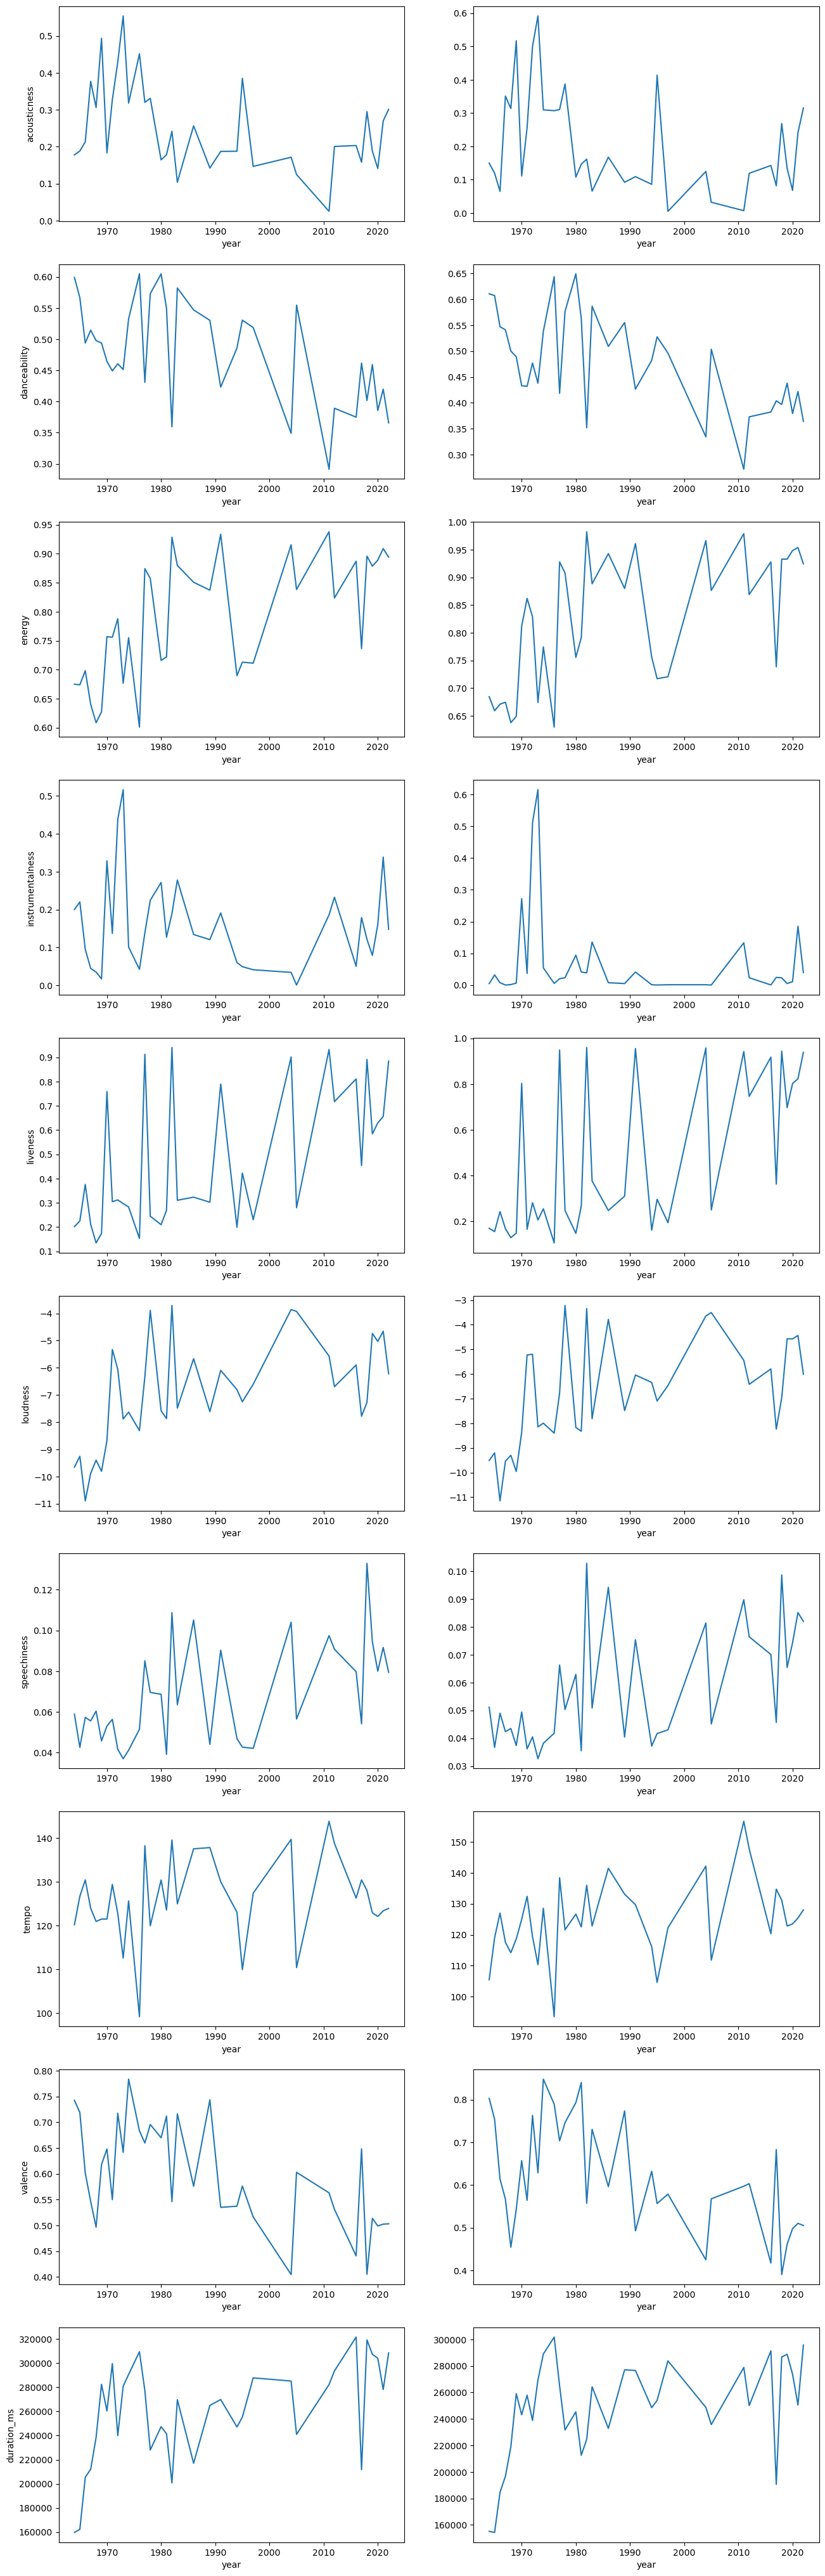

In [14]:
fig, axes = plt.subplots(10, 2, figsize=(15, 50))
properties = song_properties.columns[1:]
for p, ax in zip(song_properties.columns[1:], axes):
    meanline = song_properties.groupby('year', as_index=False)[p].mean()
    sns.lineplot(x=meanline.year, y=meanline[p], ci=None, ax=ax[0])  
    # sns.boxplot(x=song_properties.year, y=song_properties[p], showfliers=False, ax=ax[1])
    medianline = song_properties.groupby('year', as_index=False)[p].median()
    sns.lineplot(x=medianline.year, y=medianline[p], ci=None, ax=ax[1])
    ax[1].set_ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)
plt.show()

From above plots, we can relize that:
- Accoustic and intrusmental music are popular in 1970s, when electronics was not developed. Therefore, music was just created from intrusments. Moreover, Accoustic have a short popular durations in 1990s
- Dance music have had a long popular time from late 1970s but it decrease overtime.
- Energetic track popular overtime. This type have strong beat, attractive and make people feel positive.
- Livesong could be normal overtime, because almost song could use for living!
- speechiness popularity has increase overtime but it reach at most a little bit 1.2. However, there has been a huge leap in recent years marking the growth of variations such as e-books, podcasts.
- There is a surprise that audience like listenning less valence music than before. It is the result of fully using romanticism material to compose.
- Because of popularity and development of dance and envergy, loudness and tempo also increase over those time.
- Duration of a track have not changed too much overtime, the normal duration is more than 4 minutes a little bit.

## Is this a good time to produce musics?

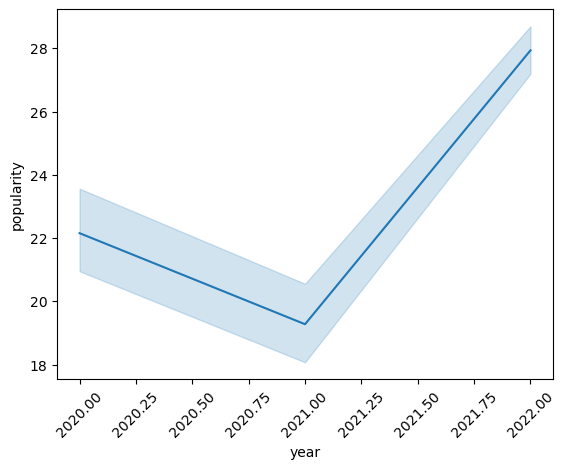

In [39]:
sns.lineplot(x=music_20_to_22.year, y=music_20_to_22.popularity)
plt.xticks(rotation=45)
plt.show()

music market increased in 2020-2021 period but has increased for this year **&rarr; This is the good time for release new songs!**

## How is music trend nowaday?
We will explore music trend in last three year, find how music properties distribute in a track for it to be attractive to community. 

In [15]:
music_20_to_22 = df.loc[(df.year >= 2020) & (df.year <= 2022)]

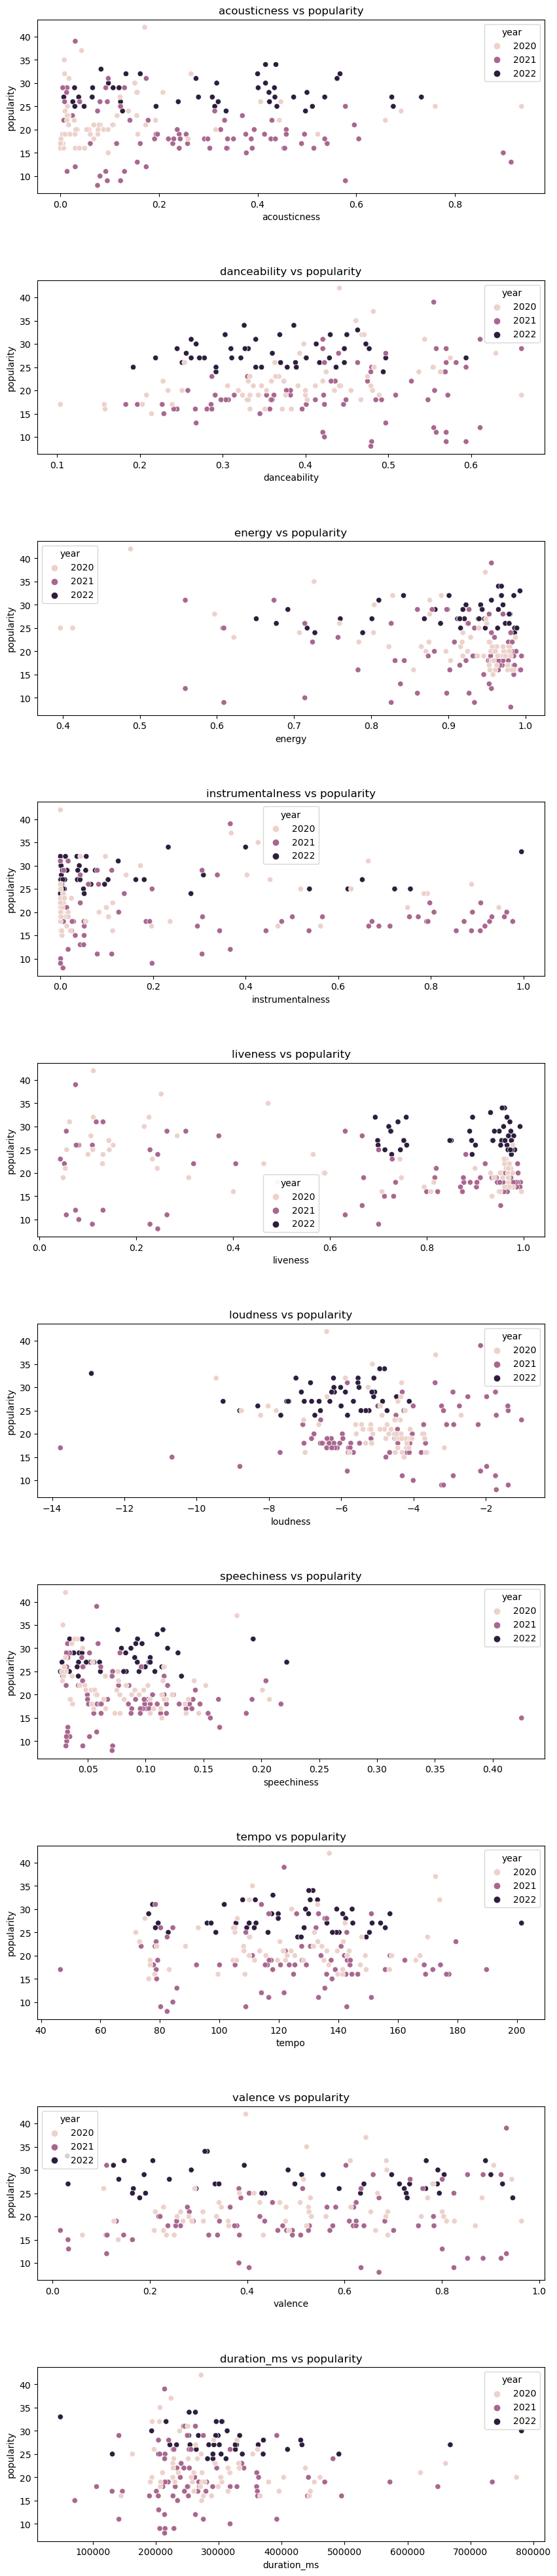

In [20]:
fig, axes = plt.subplots(10, figsize=(10, 50))
for p, ax in zip(properties, axes):
    sns.scatterplot(x=music_20_to_22[p], y=music_20_to_22.popularity, hue=music_20_to_22.year, ax=ax)
    ax.set_title(f"{p} vs popularity")

fig.subplots_adjust(hspace=0.5)
plt.show()

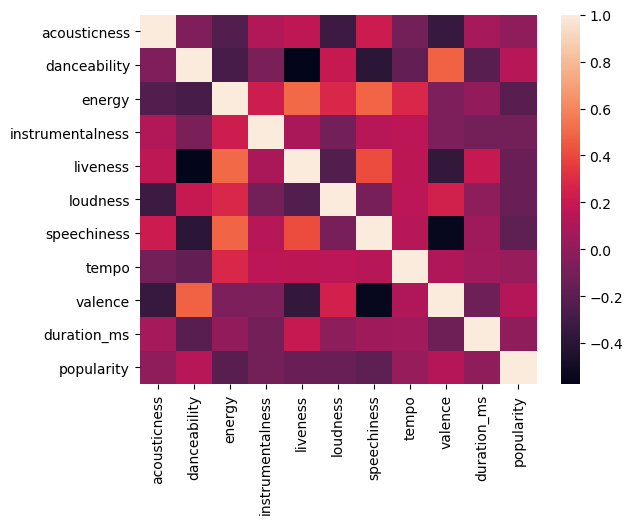

In [33]:
popularity_and_properties = properties.tolist()
popularity_and_properties.append('popularity')
sns.heatmap(music_20_to_22.loc[:, popularity_and_properties].corr())

plt.show()